# Loading A Custom Box Model in MusicBox

MusicBox has two primary ways of loading custom box models, being:
* from a pre-made example configuration path, and
* from your own JSON file.

Both of these will be looked at in this tutorial.</br>
<b>Note:</b> These configuration files will cover every aspect of the box model, being the initial and evolving conditions, the box model configurations, as well as the mechanism containing the species, reactions, and phases.

## 1. Loading Pre-made Box Model Examples

MusicBox has a couple of built in examples that are formatted as JSON files through the Examples class.</br>
These are accessed through the path attribute in each example.</br>
Once accessed, it can be loaded into the box model through the <i>loadJson()</i> function, which takes in the path as a parameter.
The supported examples include:
* [Analytical](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/analytical),
* [CarbonBond5](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/carbon_bond_5),
* [Chapman](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/chapman),
* [FlowTube](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/flow_tube),
* [TS1](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/ts1), and
* [WACCM](https://github.com/NCAR/music-box/tree/main/src/acom_music_box/examples/configs/waccm).

This code features the Analytical example, but feel free to test any of them by switching out the name where <i>Analytical</i> is in <i>Examples.Analytical.path</i>.</br>
To load, run, and visualize an example box model:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.A.mol m-3,CONC.B.mol m-3,CONC.C.mol m-3
0,0.0,200.0,70000.0,42.095324,0.800000,2.000000e-01,0.300000
1,6.0,200.0,70000.0,42.095324,0.775723,3.979221e-08,0.524277
2,12.0,200.0,70000.0,42.095324,0.752182,3.858465e-08,0.547818
3,18.0,200.0,70000.0,42.095324,0.729356,3.741374e-08,0.570644
4,24.0,200.0,70000.0,42.095324,0.707222,3.627836e-08,0.592777
...,...,...,...,...,...,...,...
96,576.0,200.0,70000.0,42.095324,0.041522,2.129939e-09,1.258478
97,582.0,200.0,70000.0,42.095324,0.040262,2.065302e-09,1.259738
98,588.0,200.0,70000.0,42.095324,0.039040,2.002627e-09,1.260960
99,594.0,200.0,70000.0,42.095324,0.037855,1.941854e-09,1.262145


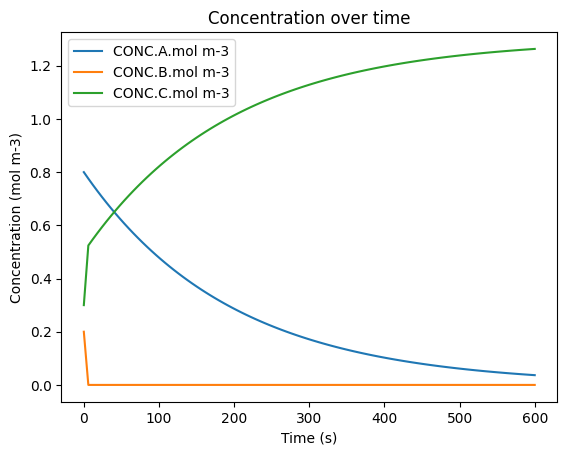

In [1]:
from acom_music_box import MusicBox, Examples
import matplotlib.pyplot as plt
import logging
import sys

logging.disable(sys.maxsize) # Prevents log spam when running this cell

box_model = MusicBox()
conditions_path = Examples.Analytical.path
box_model.loadJson(conditions_path)
df = box_model.solve()
display(df)
df.plot(x='time.s', y=['CONC.A.mol m-3', 'CONC.B.mol m-3', 'CONC.C.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()

## 2. Loading a Custom JSON Box Model Configuration

Loading your own JSON file is incredibly similar to loading a pre-made example, you just provide a path to your own configuration rather than an instance of the Examples class.</br>
To do so with a file called <i>custom_box_model.json</i> in the <i>config</i> subfolder:

Simulation Progress:   0%|          | 0/600.0 [00:00<?, ? [model integration steps (2.0 s)]/s]

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.A.mol m-3,CONC.B.mol m-3,CONC.C.mol m-3
0,0.0,200.0,70000.0,42.095324,0.800000,2.000000e-01,0.300000
1,6.0,200.0,70000.0,42.095324,0.775723,3.979221e-08,0.524277
2,12.0,200.0,70000.0,42.095324,0.752182,3.858465e-08,0.547818
3,18.0,200.0,70000.0,42.095324,0.729356,3.741374e-08,0.570644
4,24.0,200.0,70000.0,42.095324,0.707222,3.627836e-08,0.592777
...,...,...,...,...,...,...,...
96,576.0,200.0,70000.0,42.095324,0.041522,2.129939e-09,1.258478
97,582.0,200.0,70000.0,42.095324,0.040262,2.065302e-09,1.259738
98,588.0,200.0,70000.0,42.095324,0.039040,2.002627e-09,1.260960
99,594.0,200.0,70000.0,42.095324,0.037855,1.941854e-09,1.262145


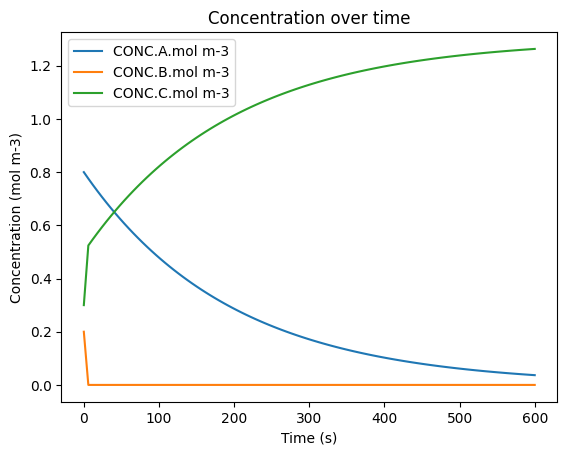

In [2]:
from acom_music_box import MusicBox
import matplotlib.pyplot as plt
import logging
import sys

logging.disable(sys.maxsize) # Prevents log spam when running this cell

box_model = MusicBox()
conditions_path = "config/custom_box_model.json"
box_model.loadJson(conditions_path)
df = box_model.solve()
display(df)
df.plot(x='time.s', y=['CONC.A.mol m-3', 'CONC.B.mol m-3', 'CONC.C.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()